# Predict the number of passengers on a airplane with LSTM

Next we will train an LSTM model to predict the number of airplane passengers. Code based on https://github.com/gianfelton/ and and course https://www.coursera.org/projects/series-temporales-con-deep-learning-rnn-lstm-prophet

## Import libraries

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import warnings
warnings.filterwarnings("ignore")

## import data

In [11]:
df = pd.read_csv('Data/AirPassengers.csv')

## Data Pre-processing

### change format to date

In [12]:
df.Month = pd.to_datetime(df.Month)

### index creation

In [13]:
df = df.set_index("Month")

### training and testing data set definition

In [14]:
train, test = df[:-12], df[-12:]

### data preprocessing with MinMaxScaler

In [15]:
#definition of the normalization method
scaler = MinMaxScaler()

#scaler learns the parameters from the training data. These parameters are used to transform the data.
scaler.fit(train)

#the training data is scaled (e.g., standardized or normalized) using the parameters learned in the previous step.
train_scaled = scaler.transform(train)

#the test data is scaled (e.g., standardized or normalized) using the parameters learned in the previous step.
test_scaled = scaler.transform(test)

### creation of the Time Series Generator object.

In [17]:
#input is the number of time steps that will be used as input to predict the next time step (12 prediction periods)
n_input = 12

#n_features is the number of features in the input data. In this case, there is only one feature.
n_features = 1

#create the TimeseriesGenerator instance
#The arguments are the input and output data (in this case, both are scaled_train_data)
#TimeseriesGenerator will generate batches of 2 consecutive time slots of scaled_train_data as input and the 
#3th time slot as output.
generator = TimeseriesGenerator(train_scaled, train_scaled, length=n_input, batch_size=6)

## LSTM model training

In [18]:
#creation of the sequential model.
model = Sequential()

#adding an LSTM (Long Short-Term Memory) layer. With 50 neurons, ReLU (Rectified Linear Unit) activation function, 
#n_input = 12 prediction periods, n_features = only one feature
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))

#adding a dense layer to your model (results output)
model.add(Dense(1))

In [19]:
#model compilation. Optimizer = adam, loss='mse' (Mean Squared Error)
model.compile(optimizer='adam', 
              loss='mse')

In [21]:
#model fit
model.fit(generator,epochs=90)

Epoch 1/90
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - loss: 0.1177
Epoch 2/90
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0139
Epoch 3/90
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0142
Epoch 4/90
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0116
Epoch 5/90
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0088
Epoch 6/90
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0075   
Epoch 7/90
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067
Epoch 8/90
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0071
Epoch 9/90
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0070
Epoch 10/90
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0080
Epoch 11/90
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0060
Epoch 12/90
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0087
Epoch 13/90
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0065
Epoch 14/90
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0067
Epoch 15/90
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0101
Epoch 16/90
20/

<Axes: >

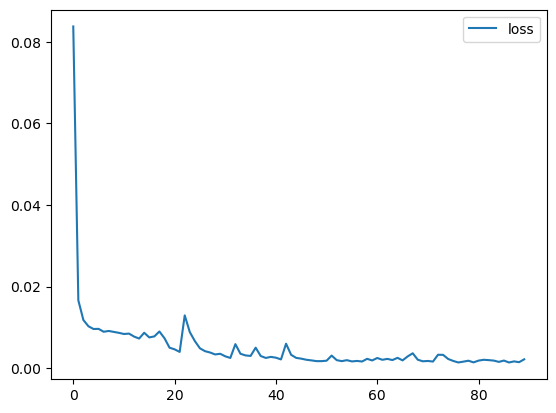

In [22]:
# extracting the loss history of the model after training
losses = pd.DataFrame(model.history.history)
losses.plot()

### 12 month prediction

Next we are going to make a prediction for 12 months (12 predictions). To do this we are going to do the following:
- create an empty list for each of our 12 predictions
- create the batch that our model will predict
- save the prediction to our list
- add the prediction to the end of the batch to use it in the next prediction

In [23]:
# create an empty list for each of our 12 predictions
pred_list = []

#create the batch that our model will predict: 
#selecting the last n_input data points from the scaled training data set to form the first batch of data to be 
#fed to the LSTM model.
#adjusting the batch of data to have the shape required by the LSTM model, which is (number of samples, time steps,
#number of features).
batch = train_scaled[-n_input:].reshape((1, n_input, n_features))

#save the prediction to our list:
#The for loop is iterating over each data point in the test data set. For each iteration, do the following:
for i in range(n_input): 
    
     # get prediction 1 time stamp ahead 
    pred_list.append(model.predict(batch)[0]) 
    
    # update batch to now include prediction and drop first value
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


#### downscaling the LSTM model predictions so that they are on the same scale as the original data 

In [31]:
#LSTM model predictions
pred_list

[array([0.5873404], dtype=float32),
 array([0.59817797], dtype=float32),
 array([0.6357456], dtype=float32),
 array([0.6682005], dtype=float32),
 array([0.7387469], dtype=float32),
 array([0.84357893], dtype=float32),
 array([0.944891], dtype=float32),
 array([0.9729515], dtype=float32),
 array([0.85507005], dtype=float32),
 array([0.7124102], dtype=float32),
 array([0.6530065], dtype=float32),
 array([0.63096607], dtype=float32)]

In [24]:
#downscaling the LSTM model predictions
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])

In [32]:
df_predict

,Prediction
Month,
1960-01-01,371.239889
1960-02-01,376.170976
1960-03-01,393.264241
1960-04-01,408.031224
1960-05-01,440.129831
1960-06-01,487.828415
1960-07-01,533.925394
1960-08-01,546.692920
1960-09-01,493.056875


#### adding the LSTM model predictions to the test data set.

In [33]:
test

,AirPassengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [34]:
#concatenating test with df_predict
df_test = pd.concat([test,df_predict], axis=1)

In [29]:
df_test

,AirPassengers,Prediction
Month,,
1960-01-01,417,371.239889
1960-02-01,391,376.170976
1960-03-01,419,393.264241
1960-04-01,461,408.031224
1960-05-01,472,440.129831
1960-06-01,535,487.828415
1960-07-01,622,533.925394
1960-08-01,606,546.692920
1960-09-01,508,493.056875


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


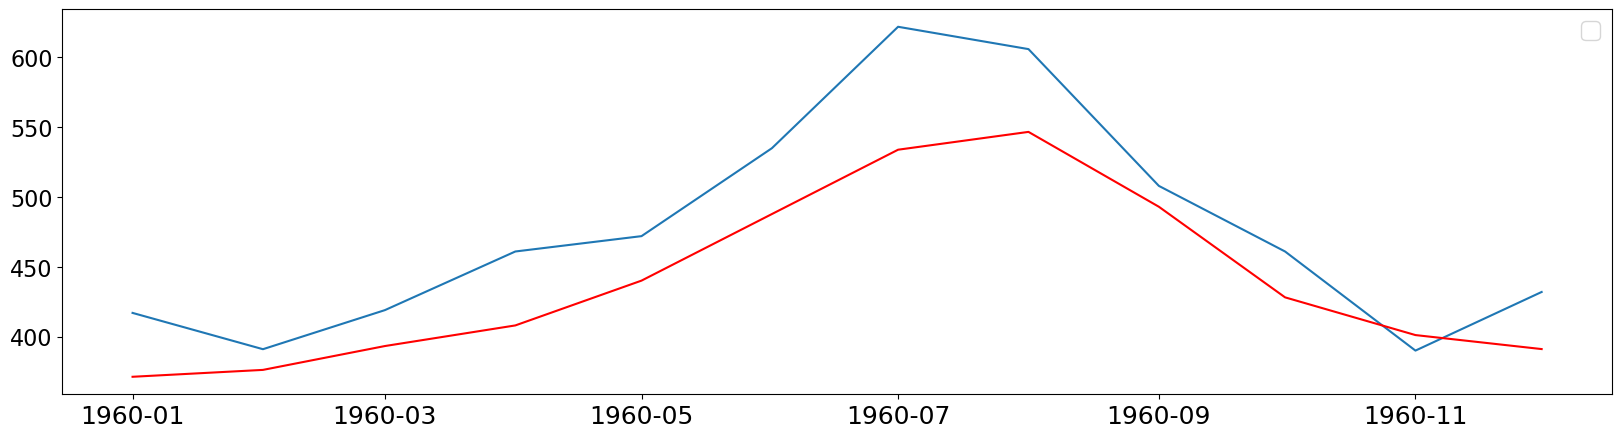

In [27]:
#Current passenger numbers and model prediction
plt.figure(figsize=(20, 5))
plt.plot(df_test.index, df_test['AirPassengers'])
plt.plot(df_test.index, df_test['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

In [28]:
#calculating the root mean square error (RMSE)
lstm_rmse_error = rmse(df_test['AirPassengers'], df_test["Prediction"])
print("rmse: ", lstm_rmse_error)

rmse:  44.156118020886254
